In [1]:
import re
import math
import warnings
import tqdm
import random
import matplotlib
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import symbols, Eq, solve
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
warnings.filterwarnings("ignore")


%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

/root/miniconda3/envs/jupyter-env/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data0 = pd.read_excel('1a数据_已替换时间戳_已矫正.xlsx')
flow_cols =[col for col in data0.columns if col.endswith('流水号')]
subset_df = data0[flow_cols][:100]

# 计算每行的最大值和最小值
subset_df['最大值'] = subset_df.max(axis=1)
subset_df['最小值'] = subset_df.min(axis=1)

# 创建一个新的DataFrame，只包含最大值和最小值列
result_df = subset_df[['最大值', '最小值']]/3600
result_df

,最大值,最小值
0,425.538333,2.5
1,1119.191944,3.0
2,39.595833,2.0
3,227.501111,1.0
4,97.943056,5.0
...,...,...
95,595.642778,1.0
96,171.400278,3.0
97,903.368333,2.5
98,42.529444,3.0


In [3]:
data1 = pd.read_excel('血肿1a_100人拟合函数选择结果.xlsx')
data1 = data1.drop(['Unnamed: 0'], axis=1)

def convert_coef_string(coef_str):
    coef_str = coef_str.strip('[]')
    coef_list = coef_str.split()
    coef_matrix = np.array([float(val) for val in coef_list])
    return coef_matrix

# 使用apply函数将转换函数应用到data1['回归系数']列的每个元素
data1['回归系数'] = data1['回归系数'].apply(convert_coef_string)

# data2 = pd.concat([data1, result_df], axis = 1)
# data2

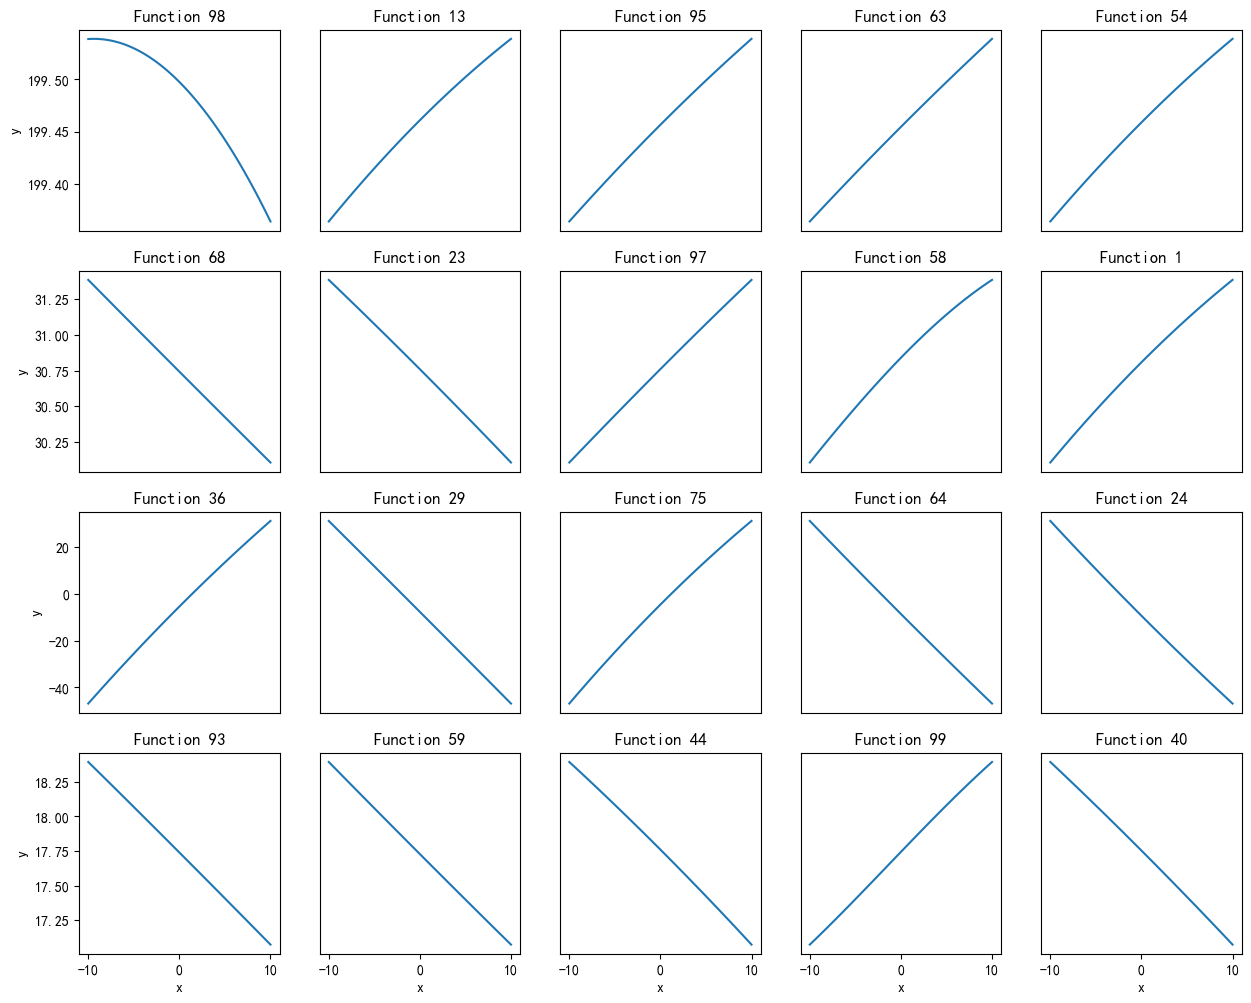

In [4]:
# 定义一个函数来计算三次函数的值
def cubic_function(x, coef):
    return coef[0] * x**3 + coef[1] * x**2 + coef[2] * x + coef[3]

# 生成x轴的值
x = np.linspace(-10, 10, 100)

# 创建一个包含5列4行的大图，并调整子图之间的垂直间距
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.subplots_adjust(hspace=0.2)  # 调整垂直方向的间距

# 随机选择20个三次函数的索引
random_indices = random.sample(range(len(data1)), 20)

# 绘制随机选择的三次函数的图形
for i, ax in enumerate(axes.ravel()):
    index = random_indices[i]
    coef = data1.loc[index, '回归系数']
    y = cubic_function(x, coef)

    ax.plot(x, y)
    if i // 5 != 3:
        ax.set_xticks([])
    if i % 5 != 0:
        ax.set_yticks([])
    # 只有当行索引大于等于3时，才设置xlabel
    if i // 5 >= 3:
        ax.set_xlabel('x')
    if (i % 5) == 0:
        ax.set_ylabel('y')
    ax.set_title(f'Function {index+1}')

plt.savefig('q11_20sub.png', dpi=1000)
plt.show()
